# Normalize Snow Depth Timeseries from WY2021 to WY2023
Using the pickle files import from **3_create_tidy_pickle.ipynb**

env: running with **raster** right now since I do not need rioxarray

In [2]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

Open the cleaned pickle files

In [3]:
# forest and gap sites 
CNF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF21.pkl", "rb"))
CNG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG21.pkl", "rb"))
CSF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF21.pkl", "rb"))
CSG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG21.pkl", "rb"))

CNF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF23.pkl", "rb"))
CNG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG23.pkl", "rb"))
CSF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF23.pkl", "rb"))
CSG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG23.pkl", "rb"))

# the other post treatment sites 
CN20 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN20.pkl", "rb"))
CN50 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN50.pkl", "rb"))
CN60 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN60.pkl", "rb"))
CN70 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN70.pkl", "rb"))

CS20  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS20.pkl", "rb"))
CS50  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS50.pkl", "rb"))
CS60  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS60.pkl", "rb"))
CS120 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS120.pkl", "rb"))

In [4]:
# now the SDD files too
SDD_CN23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CN23.pkl", "rb"))
SDD_CS23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CS23.pkl", "rb"))

### Now, let's normalize snow depth from the treatment sites to the control (forest and gap) sites
* Looking at the difference (or percent difference) between each forest treatment site and the corresponding control sites
* The idea is that even though snow recieved in one year isn't the same as the previous, the difference between the two locations might be the same 

Thus, 
* computing sets of differences for "snow depth at the north treatment site" - "snow depth at the north control site" and same for the south side 
* then we can see how these changes pre-and post-treatment 
* the result a plot of these differences over time for each test site, for the pre-treatment and the post-treatment winter 

In [5]:
# normalized to the forest side (f) vs the gap side (g) on the same slope as the treatment sites
# north sites 
CN20['normf'] = CN20['Median_depth'] - CNF23['Median_depth']
CN20['normg'] = CN20['Median_depth'] - CNG23['Median_depth']

CN50['normf'] = CN50['Median_depth'] - CNF23['Median_depth']
CN50['normg'] = CN50['Median_depth'] - CNG23['Median_depth']

CN60['normf'] = CN60['Median_depth'] - CNF23['Median_depth']
CN60['normg'] = CN60['Median_depth'] - CNG23['Median_depth']

CN70['normf'] = CN70['Median_depth'] - CNF23['Median_depth']
CN70['normg'] = CN70['Median_depth'] - CNG23['Median_depth']

# south sites
CS20['normf'] = CS20['Median_depth'] - CSF23['Median_depth']
CS20['normg'] = CS20['Median_depth'] - CSG23['Median_depth']

CS50['normf'] = CS50['Median_depth'] - CSF23['Median_depth']
CS50['normg'] = CS50['Median_depth'] - CSG23['Median_depth']

CS60['normf'] = CS60['Median_depth'] - CSF23['Median_depth']
CS60['normg'] = CS60['Median_depth'] - CSG23['Median_depth']

CS120['normf'] = CS120['Median_depth'] - CSF23['Median_depth']
CS120['normg'] = CS120['Median_depth'] - CSG23['Median_depth']

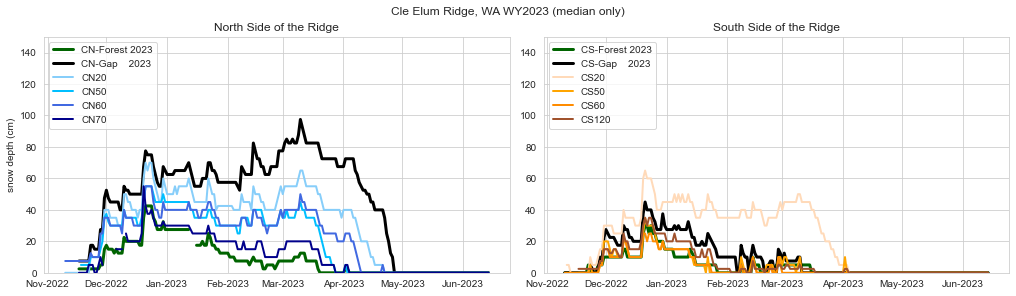

In [6]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = 'orange', label="CS50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['Median_depth'], color = 'darkorange', label="CS60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS120",  linewidth=2)


# add lines for the lidar data flights
# ax[0].axvline(x=datetime.date(2023, 3, 6), color='k', linestyle='--', label="RAPID Lidar Flight")
# ax[1].axvline(x=datetime.date(2023, 3, 6), color='k', linestyle='--', label="RAPID Lidar Flight")


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

# ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
# ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA WY2023 (median only)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Now, plot the normalized column instead

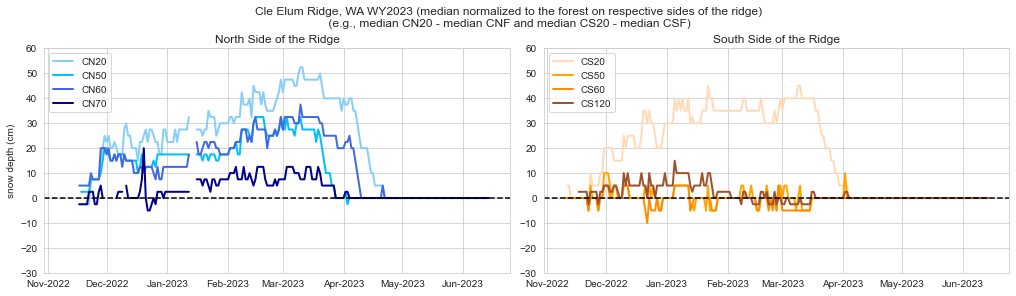

In [7]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# # then just plot the median for the forest and gap sites
# ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
# ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
# ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
# ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['normf'], color = 'lightskyblue', label="CN20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['normf'], color = 'deepskyblue', label="CN50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['normf'], color = 'royalblue', label="CN60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['normf'], color = 'darkblue', label="CN70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['normf'], color = 'peachpuff', label="CS20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['normf'], color = 'orange', label="CS50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['normf'], color = 'darkorange', label="CS60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['normf'], color = 'sienna', label="CS120",  linewidth=2)


# add lines for the lidar data flights
# ax[0].axvline(x=datetime.date(2023, 3, 6), color='k', linestyle='--', label="RAPID Lidar Flight")
# ax[1].axvline(x=datetime.date(2023, 3, 6), color='k', linestyle='--', label="RAPID Lidar Flight")

# ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
# ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

# set plotting constants
ax[0].set_ylim(-30, 60)
ax[1].set_ylim(-30, 60)

# plot a zero line for the normalized data
ax[0].axhline(y=0, color='k', linestyle='--')
ax[1].axhline(y=0, color='k', linestyle='--')

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA WY2023 (median normalized to the forest on respective sides of the ridge)\n (e.g., median CN20 - median CNF and median CS20 - median CSF)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

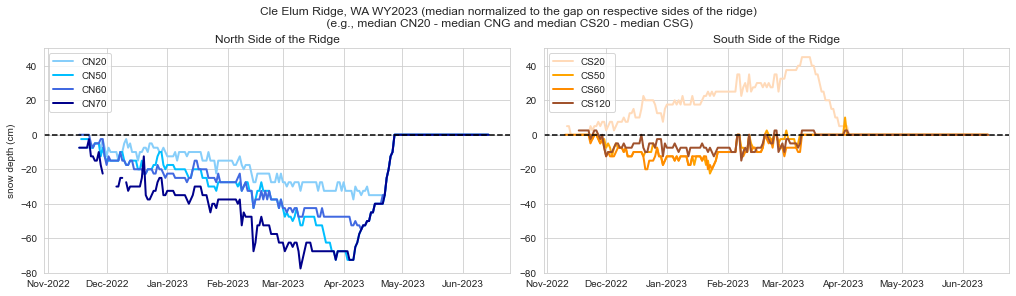

In [8]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# # then just plot the median for the forest and gap sites
# ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
# ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
# ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
# ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['normg'], color = 'lightskyblue', label="CN20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['normg'], color = 'deepskyblue', label="CN50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['normg'], color = 'royalblue', label="CN60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['normg'], color = 'darkblue', label="CN70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['normg'], color = 'peachpuff', label="CS20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['normg'], color = 'orange', label="CS50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['normg'], color = 'darkorange', label="CS60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['normg'], color = 'sienna', label="CS120",  linewidth=2)


# add lines for the lidar data flights
# ax[0].axvline(x=datetime.date(2023, 3, 6), color='k', linestyle='--', label="RAPID Lidar Flight")
# ax[1].axvline(x=datetime.date(2023, 3, 6), color='k', linestyle='--', label="RAPID Lidar Flight")

# ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
# ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

# set plotting constants
ax[0].set_ylim(-80, 50)
ax[1].set_ylim(-80, 50)

# plot a zero line for the normalized data
ax[0].axhline(y=0, color='k', linestyle='--')
ax[1].axhline(y=0, color='k', linestyle='--')

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA WY2023 (median normalized to the gap on respective sides of the ridge)\n (e.g., median CN20 - median CNG and median CS20 - median CSG)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

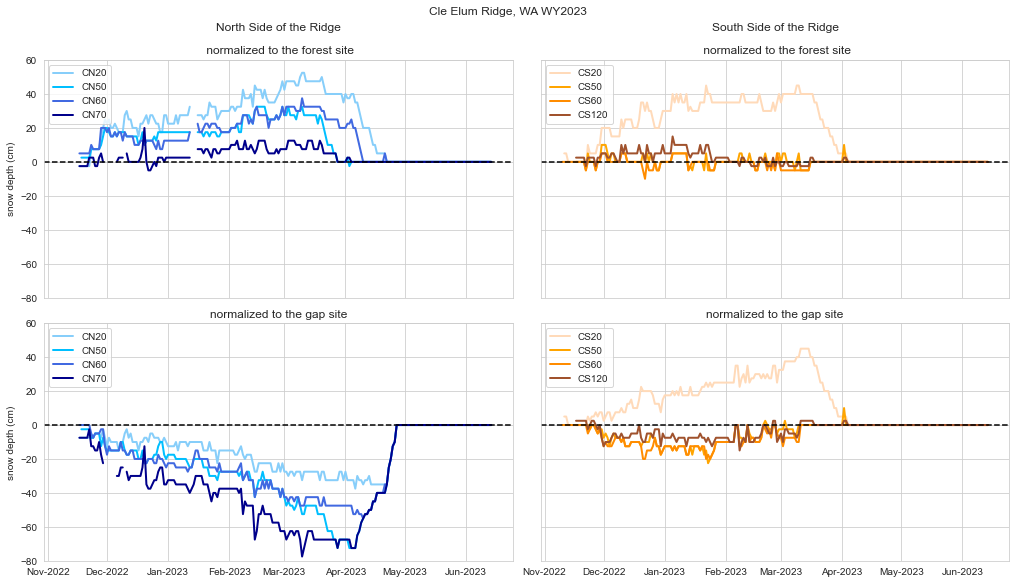

In [9]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2,figsize = (14,8), sharey=True, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# ROW 1 - normalized with forest site
ax[0,0].plot(CN20['Date'], CN20['normf'], color = 'lightskyblue', label="CN20", linewidth=2)
ax[0,0].plot(CN50['Date'], CN50['normf'], color = 'deepskyblue', label="CN50"  , linewidth=2)
ax[0,0].plot(CN60['Date'], CN60['normf'], color = 'royalblue', label="CN60"  , linewidth=2)
ax[0,0].plot(CN70['Date'], CN70['normf'], color = 'darkblue', label="CN70"  , linewidth=2)

ax[0,1].plot(CS20['Date'], CS20['normf'], color = 'peachpuff', label="CS20", linewidth=2)
ax[0,1].plot(CS50['Date'], CS50['normf'], color = 'orange', label="CS50",  linewidth=2)
ax[0,1].plot(CS60['Date'], CS60['normf'], color = 'darkorange', label="CS60",  linewidth=2)
ax[0,1].plot(CS120['Date'], CS120['normf'], color = 'sienna', label="CS120",  linewidth=2)

# ROW 1 - normalized with forest site
ax[1,0].plot(CN20['Date'], CN20['normg'], color = 'lightskyblue', label="CN20", linewidth=2)
ax[1,0].plot(CN50['Date'], CN50['normg'], color = 'deepskyblue', label="CN50"  , linewidth=2)
ax[1,0].plot(CN60['Date'], CN60['normg'], color = 'royalblue', label="CN60"  , linewidth=2)
ax[1,0].plot(CN70['Date'], CN70['normg'], color = 'darkblue', label="CN70"  , linewidth=2)

ax[1,1].plot(CS20['Date'], CS20['normg'], color = 'peachpuff', label="CS20", linewidth=2)
ax[1,1].plot(CS50['Date'], CS50['normg'], color = 'orange', label="CS50",  linewidth=2)
ax[1,1].plot(CS60['Date'], CS60['normg'], color = 'darkorange', label="CS60",  linewidth=2)
ax[1,1].plot(CS120['Date'], CS120['normg'], color = 'sienna', label="CS120",  linewidth=2)

# set plotting constants
ax[0,0].set_ylim(-80, 60)
ax[0,1].set_ylim(-80, 60)
ax[1,0].set_ylim(-80, 60)
ax[1,1].set_ylim(-80, 60)

# plot a zero line for the normalized data
ax[0,0].axhline(y=0, color='k', linestyle='--')
ax[0,1].axhline(y=0, color='k', linestyle='--')
ax[1,0].axhline(y=0, color='k', linestyle='--')
ax[1,1].axhline(y=0, color='k', linestyle='--')

ax[0,0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[1,0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))

ax[0,0].set_ylabel("snow depth (cm)")
ax[1,0].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA WY2023")

ax[0,0].set_title("North Side of the Ridge\n \n normalized to the forest site")
ax[1,0].set_title("normalized to the gap site")
ax[0,1].set_title("South Side of the Ridge\n \n normalized to the forest site")
ax[1,1].set_title("normalized to the gap site")

# ax[0,0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])

ax[0,0].legend(loc='upper left')
ax[0,1].legend(loc='upper left')
ax[1,0].legend(loc='upper left')
ax[1,1].legend(loc='upper left')

## Now, compare the difference plots of WY2021 and WY2023
* fixed the code below by resampling to daily

In [10]:
CNF21b = CNF21.copy()
CNG21b = CNG21.copy()
CSF21b = CSF21.copy()
CSG21b = CSG21.copy()

CNF23b = CNF23.copy()
CNG23b = CNG23.copy()
CSF23b = CSF23.copy()
CSG23b = CSG23.copy()

# okay, github copilot recommended this instead? let's try 
CNF21b['Date'] = CNF21b['Date'] + pd.DateOffset(years=2)
CNG21b['Date'] = CNG21b['Date'] + pd.DateOffset(years=2)
CSF21b['Date'] = CSF21b['Date'] + pd.DateOffset(years=2)
CSG21b['Date'] = CSG21b['Date'] + pd.DateOffset(years=2)

In [11]:
# try resampling both datasets to daily
CNF21b = CNF21b.resample('D', on='Date').mean()
CNG21b = CNG21b.resample('D', on='Date').mean()
CSF21b = CSF21b.resample('D', on='Date').mean()
CSG21b = CSG21b.resample('D', on='Date').mean()

CNF23b = CNF23b.resample('D', on='Date').mean()
CNG23b = CNG23b.resample('D', on='Date').mean()
CSF23b = CSF23b.resample('D', on='Date').mean()
CSG23b = CSG23b.resample('D', on='Date').mean()

In [12]:
CNG23b['minus21'] = CNG23b['Median_depth'] - CNG21b['Median_depth']
CNF23b['minus21'] = CNF23b['Median_depth'] - CNF21b['Median_depth']

CSG23b['minus21'] = CSG23b['Median_depth'] - CSG21b['Median_depth']
CSF23b['minus21'] = CSF23b['Median_depth'] - CSF21b['Median_depth']

CSF23b['Date'] = CSF23b.index
CSG23b['Date'] = CSG23b.index
CNF23b['Date'] = CNF23b.index
CNG23b['Date'] = CNG23b.index

In [13]:
CSF23b.head()

,Pole1obs,Pole1,Pole2obs,Pole2,Pole3obs,Pole3,FSCA,Median_depth,Maximum_depth,Minimum_depth,minus21,Date
Date,,,,,,,,,,,,
2022-11-10,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,-5.0,2022-11-10
2022-11-11,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,-15.0,2022-11-11
2022-11-12,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,-15.0,2022-11-12
2022-11-13,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,-15.0,2022-11-13
2022-11-14,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,-20.0,2022-11-14


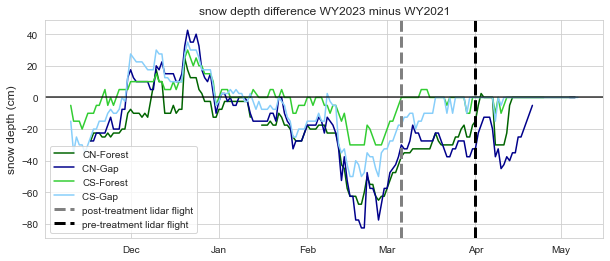

In [17]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (10,4))

alpha=0.2
colorf1 = "darkgreen"
colorg1 = "darkblue"

colorf2 = "limegreen"
colorg2 = "lightskyblue"

#WY2023
ax.plot(CNF23b['Date'], CNF23b['minus21'], label = "CN-Forest", color = colorf1)
ax.plot(CNG23b['Date'], CNG23b['minus21'], label = "CN-Gap   ", color = colorg1)
ax.plot(CSF23b['Date'], CSF23b['minus21'], label = "CS-Forest", color = colorf2)
ax.plot(CSG23b['Date'], CSG23b['minus21'], label = "CS-Gap   ", color = colorg2)

# verticle line at 0
ax.axhline(y=0, color='k', linestyle='-', alpha=.8)

# add lidar flight dates
ax.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax.axvline(x=datetime.date(2023, 4, 1), color='black', linestyle='--', label="pre-treatment lidar flight", linewidth=3)

# ax.set_ylim(0,110)
# ax.set_xlim([datetime.date(2022, 11, 18), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.set_ylabel("snow depth (cm)", fontsize=12)
plt.title("snow depth difference WY2023 minus WY2021")
plt.legend(loc='best')

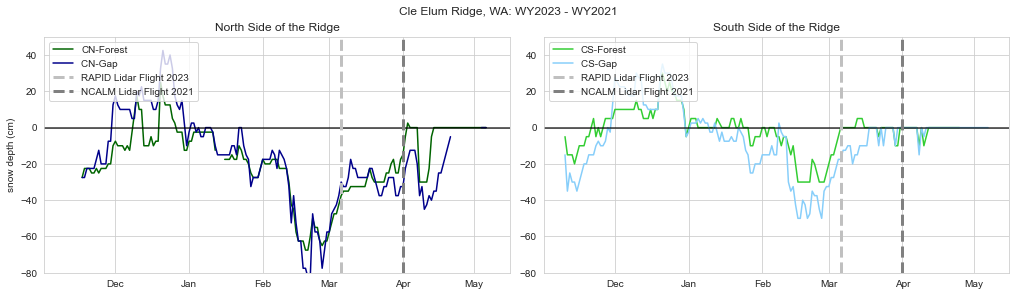

In [15]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

colorf1 = "darkgreen"
colorg1 = "darkblue"

colorf2 = "limegreen"
colorg2 = "lightskyblue"

#WY2023
ax[0].plot(CNF23b['Date'], CNF23b['minus21'], label = "CN-Forest", color = colorf1)
ax[0].plot(CNG23b['Date'], CNG23b['minus21'], label = "CN-Gap   ", color = colorg1)
ax[1].plot(CSF23b['Date'], CSF23b['minus21'], label = "CS-Forest", color = colorf2)
ax[1].plot(CSG23b['Date'], CSG23b['minus21'], label = "CS-Gap   ", color = colorg2)

# set plotting constants
ax[0].set_ylim(-80, 50)
ax[1].set_ylim(-80, 50)

# verticle line at 0
ax[0].axhline(y=0, color='k', linestyle='-', alpha=.8)
ax[1].axhline(y=0, color='k', linestyle='-', alpha=.8)

# add lidar flight dates
ax[0].axvline(x=datetime.date(2023, 3, 6), color='silver', linestyle='--', label="RAPID Lidar Flight 2023", linewidth=3)
ax[0].axvline(x=datetime.date(2023, 4, 1), color='grey', linestyle='--', label="NCALM Lidar Flight 2021", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='silver', linestyle='--', label="RAPID Lidar Flight 2023", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 4, 1), color='grey', linestyle='--', label="NCALM Lidar Flight 2021", linewidth=3)

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA: WY2023 - WY2021")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')